* In this problem statement we are trying to build a model that helps us in analysing the data and find if the comments on a Youtube video is Spam or not. It is a problem belonging to ***NLP Problems***

#Mounting to Google Drive

In [3]:
pip install --upgrade protobuf==3.20.0


  Using cached protobuf-3.20.0-cp39-cp39-win_amd64.whl (904 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.21.2
    Uninstalling protobuf-4.21.2:
      Successfully uninstalled protobuf-4.21.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\rayst\\AppData\\Local\\Programs\\Python\\Python39\\Lib\\site-packages\\google\\~upb\\_message.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [1]:
from pathlib import Path
import os
import sys

sys.path.append(str(Path(os.getcwd()).parents[1]))
from Helper_Functions import common_utils
directory_to_extract_to = os.getcwd()

common_utils.load_data_from_one_drive(directory_to_extract_to, "nlp_paths", "sentimental_analysis")

Extracting : 100%|██████████| 11/11 [00:00<00:00, 84.50it/s]


#Importing Packages

In [4]:
# Ignore harmless warnings
import sys
import warnings
warnings.filterwarnings("ignore")

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels as sm
import matplotlib
import math

In [3]:
from tqdm import tqdm
import re
import string
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import contractions
stopwords=stopwords.words('english')
#Removing stopwords 'no','nor' and 'not' as this will affect the overall sentiment
stopwords.remove('no')
stopwords.remove('nor')
stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rayst\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from sklearn.svm import SVC as svc 
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec

#Importing CSV

We have 5 different datasets containing similar data, hence we can merge them together as a singe dataset

In [ ]:
df_psy = pd.read_csv('Youtube01-Psy.csv')
df_katy = pd.read_csv('Youtube02-KatyPerry.csv')
df_lmfao = pd.read_csv('Youtube03-LMFAO.csv')
df_eminem = pd.read_csv('Youtube04-Eminem.csv')
df_shakira = pd.read_csv('Youtube05-Shakira.csv')

NameError: name 'pd' is not defined

In [10]:
df_psy

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...,...,...
345,z13th1q4yzihf1bll23qxzpjeujterydj,Carmen Racasanu,2014-11-14T13:27:52,How can this have 2 billion views when there's...,0
346,z13fcn1wfpb5e51xe04chdxakpzgchyaxzo0k,diego mogrovejo,2014-11-14T13:28:08,I don't now why I'm watching this in 2014﻿,0
347,z130zd5b3titudkoe04ccbeohojxuzppvbg,BlueYetiPlayz -Call Of Duty and More,2015-05-23T13:04:32,subscribe to me for call of duty vids and give...,1
348,z12he50arvrkivl5u04cctawgxzkjfsjcc4,Photo Editor,2015-06-05T14:14:48,hi guys please my android photo editor downloa...,1


In [11]:
df_katy

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free ...,1
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-...,1
2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,Hey guys! Please join me in my fight to help a...,1
3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,2014-08-01T21:04:03,Hey everyone. Watch this trailer!!!!!!!! http...,1
...,...,...,...,...,...
345,z12sjp3zgtqnvlysj23zuxxaolrvd1oj504,Kacy Cluley,2015-06-05T18:59:52,This song means so much to me thank you soooo...,0
346,z132enrpoy35yxpoe04cjr4zur3jvbyq3xo0k,Kasia Fabisiewicz,2015-06-05T19:02:05,&lt;3﻿,0
347,z132jbmxfqm4fjysg23nwjfb2mv2vxnua,Decio Alves Martins,2015-06-05T19:29:20,"KATY PERRY, I AM THE ""DÉCIO CABELO"", ""DECIO HA...",1
348,z12cdlswetvnejcri04cex0jfwy2u3tzj54,Rafi Hossain,2015-06-05T19:55:08,Honestly speaking except taylor swift and adel...,0


In [12]:
df_lmfao

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13uwn2heqndtr5g304ccv5j5kqqzxjadmc0k,Corey Wilson,2015-05-28T21:39:52.376000,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,z124jvczaz3dxhnbc04cffk43oiugj25yzo0k,Epic Gaming,2015-05-28T20:07:20.610000,wierd but funny﻿,0
2,z13tczjy5xj0vjmu5231unho1ofey5zdk,LaS Music,2015-05-28T19:23:35.355000,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1
3,z13tzr0hdpnayhqqc04cd3zqqqjkf3ngckk0k,Cheryl Fox,2015-05-28T17:49:35.294000,Party Rock....lol...who wants to shuffle!!!﻿,0
4,z12pcvix4zedcjvyb04ccr1r0mr2g5xwyng0k,PATRICK_TW,2015-05-28T16:28:26.818000,Party rock﻿,0
...,...,...,...,...,...
433,z13lvr4iupatjlrem231yvpxolzvspwdl,Salty Croc,2014-07-22T04:20:37.489000,Like this comment for no reason﻿,1
434,z12lxhrqdkyusbkji04cihtrvn3jvxnqszg0k,Bob Orton,2014-07-22T00:26:50.820000,love this song﻿,0
435,z12xhdjrsxm3v550w22oynsjrnmvjhkvj,LuckyMusiqLive,2014-07-21T22:25:54.048000,this song is awesome. these guys are the best....,1
436,z13msngo3qvwx1ym223pehqgouexzdmnm,xXxPWND 420xXx,2014-07-21T11:05:51.945000,HOW MANY THUMBS UP FOR LOUIS SAVING THE DAY!?!?﻿,1


In [13]:
df_eminem

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1
...,...,...,...,...,...
443,LneaDw26bFu3RCmyrWyP9S6wh1h9dBv3X95g1HzKAb4,Dany PK,NaN,SUBSCRIBE TO MY CHANNEL X PLEASE!. SPARE,1
444,LneaDw26bFsD65dtIvAEObWYIYnFTqQDKBek_Ypz3J8,SmexyFriedChicken,NaN,Check out my videos guy! :) Hope you guys had ...,1
445,LneaDw26bFuvs-8oWkLpAFa6g3QHpWD8k7sbbMP3Bg8,The Guy That's Done Everything,NaN,3 yrs ago I had a health scare but thankfully ...,1
446,z12hfp2wmyuqztkw504cgblyxtbsxjuzeow0k,Jesse Pinkman,2015-05-06T11:42:44.601000,Rihanna looks so beautiful with red hair ;)﻿,0


In [14]:
df_shakira

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach...",0
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0
...,...,...,...,...,...
365,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0
366,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
367,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0
368,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0


In [15]:
# To bulid a sentiment analysis model, we just need 'Content' and 'Class', hence we remove the rest before merging
df_psy.drop(columns = ['COMMENT_ID', 'DATE', 'AUTHOR'], inplace = True)
df_katy.drop(columns = ['COMMENT_ID', 'DATE', 'AUTHOR'], inplace = True)
df_lmfao.drop(columns = ['COMMENT_ID', 'DATE', 'AUTHOR'], inplace = True)
df_eminem.drop(columns = ['COMMENT_ID', 'DATE', 'AUTHOR'], inplace = True)
df_shakira.drop(columns = ['COMMENT_ID', 'DATE', 'AUTHOR'], inplace = True)

In [16]:
frames = [df_psy, df_katy, df_lmfao, df_eminem, df_shakira]
comb_df = pd.concat(frames)
comb_df.reset_index(inplace = True, drop = True)

In [17]:
comb_df

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...
1951,I love this song because we sing it at Camp al...,0
1952,I love this song for two reasons: 1.it is abou...,0
1953,wow,0
1954,Shakira u are so wiredo,0


#Data Cleaning

In [18]:
processed_mails=[]
for i in tqdm(comb_df['CONTENT']):
    #Regular expression that removes all the html tags pressent in the reviews
    i=re.sub('(<[\w\s]*/?>)',"",i)
    #Expanding all the contractions present in the review to is respective actual form
    i=contractions.fix(i)
    #Removing all the special characters from the review text
    i=re.sub('[^a-zA-Z0-9\s]+',"",i)
    #Removing all the digits present in the review text
    i=re.sub('\d+',"",i)
    # i=re.sub('[\n\t\s\b]','',i)
    #Removing the html links
    s=re.sub(r"http\S+", " ", i)
    i=re.sub(r"www.\S+", " ", s)
    #Removing some patterns
    i=re.sub("\\s*\\b(?=\\w*(\\w)\\1{2,})\\w*\\b",' ',i)
    i=re.sub(r"\S*\.com\S*|\S*watch\?\S*",'', i)
    #Making all the review text to be of lower case as well as removing the stopwords and words of length less than 3
    processed_mails.append(" ".join([j.lower() for j in i.split() if j not in stopwords and len(j)>=1]))

100%|██████████| 1956/1956 [00:00<00:00, 10260.88it/s]


In [19]:
comb_df['CleanedContent'] = processed_mails
comb_df['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in comb_df['CleanedContent']]

In [20]:
comb_df.head(10)

,CONTENT,CLASS,CleanedContent,tokenized_text
0,"Huh, anyway check out this you[tube] channel: ...",1,huh anyway check youtube channel kobyoshi,"[huh, anyway, check, youtube, channel, kobyoshi]"
1,Hey guys check out my new channel and our firs...,1,hey guys check new channel first vid this is u...,"[hey, guys, check, new, channel, first, vid, t..."
2,just for test I have to say murdev.com,1,test i say murdevcom,"[test, say, murdevcom]"
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,shaking sexy ass channel enjoy,"[shaking, sexy, ass, channel, enjoy]"
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,watchvvtarggvgtwq check,[check]
5,"Hey, check out my new website!! This site is a...",1,hey check new website this site kids stuff kid...,"[hey, check, new, website, this, site, kids, s..."
6,Subscribe to my channel ﻿,1,subscribe channel,"[subscribe, channel]"
7,i turned it on mute as soon is i came on i jus...,0,turned mute soon came wanted check views,"[turned, mute, soon, came, wanted, check, views]"
8,You should check my channel for Funny VIDEOS!!﻿,1,you check channel funny videos,"[you, check, channel, funny, videos]"
9,and u should.d check my channel and tell me wh...,1,shouldd check channel tell i next,"[shouldd, check, channel, tell, next]"


#Splitting Data

In [21]:
#Splitting the data into dependent and independent variables i.e, features and the target columns
X=comb_df['CleanedContent']
Y=comb_df['CLASS']

In [22]:
missing_value = X.loc[X == '']
for i in missing_value.index:
  X = X.drop(i)
  Y = Y.drop(i)

In [23]:
#Splitting the data such that 33% will be used for testing and the remaining 67% will be used for training. 
X_train,X_test,y_train,y_test=train_test_split(X,Y,stratify=Y,test_size=0.33)
#when stratify is provided the splitting of data into train and test datasets agree with the composition of actual possitive and negative reviews present in the dataset

#Vectorization
* We have two different ways to vectorize the text data into numerical value
  * TF-IDF
  * Word2Vec
* Both have pros and cons
  * TF-IDF is simple to use library but it does not keep the semantics of the data
  * Word2Vec is more complex comparitively but it keeps the semantics and also the relation between various words like - man and woman, king and queen,etc.
  * Different vectorizer will be more useful depending on what NLP insight we want from the data
  * For the current scenario of Sentiment Analysis, TF-IDF gives us a better result comparitively

#Vectorization (TF-IDF)

##SVM (No Hyperparamter Tuning)

In [ ]:
# training the vectorizer 
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [ ]:
# Define the model
from sklearn.svm import SVC as svc 
svm = svm.SVC(C=1000)
svm.fit(X_train, y_train)

SVC(C=1000)

In [ ]:
# Predicting the values
X_test = vectorizer.transform(X_test)
y_pred = svm.predict(X_test)

In [ ]:
# Printing out the actual vs predicited matrix(Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
index = ['Actually Ham', 'Actually Spam']
df_cm = pd.DataFrame(cm, columns = ['Predicted to be Ham', 'Predicted to be Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm.T

,Actually Ham,Actually Spam
Predicted to be Ham,73,13
Predicted to be Spam,4,106


In [ ]:
73/86
73/77
106/110

In [ ]:
# Printing out the Evaluation Matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90        77
           1       0.96      0.89      0.93       119

    accuracy                           0.91       196
   macro avg       0.91      0.92      0.91       196
weighted avg       0.92      0.91      0.91       196



##SVM (Hyperparameter Tuning)

In [24]:
# training the vectorizer 
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [25]:
%%time

# Using RandomSearchCV to find the best combination of hyperparameter values for the model
mdl = svc(probability = True, random_state = 1)
auc = make_scorer(roc_auc_score)

# Dictionary of the possible hyperparameter values
rand_list = {"C": stats.uniform(10, 250),
             "gamma": stats.uniform(0.01, 1)}
              
rand_search = RandomizedSearchCV(mdl, param_distributions = rand_list, n_iter = 100, n_jobs = 4, cv = 3, random_state = 2017, scoring = auc) 
# Printing the results
rand_search.fit(X_train, y_train) 
rand_search.best_params_

CPU times: user 3.42 s, sys: 231 ms, total: 3.66 s
Wall time: 1min 47s


In [26]:
# Defining the model and using the hyperparameters found above
from sklearn.svm import SVC as svc 
svm = svm.SVC(**rand_search.best_params_)
svm.fit(X_train, y_train)

SVC(C=72.1449576861279, gamma=0.669246220372965)

In [27]:
# Predicting the values based on the defined Model
X_test = vectorizer.transform(X_test)
y_pred = svm.predict(X_test)

In [28]:
# Printing the actual vs predicited matrix (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
index = ['Actually Ham', 'Actually Spam']
df_cm = pd.DataFrame(cm, columns = ['Predicted to be Ham', 'Predicted to be Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm.T

,Actually Ham,Actually Spam
Predicted to be Ham,293,32
Predicted to be Spam,14,282


In [29]:
# Printing the Evaluation Matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       307
           1       0.95      0.90      0.92       314

    accuracy                           0.93       621
   macro avg       0.93      0.93      0.93       621
weighted avg       0.93      0.93      0.93       621



##Logistic Regression (Hyperparameter Tuning)

In [ ]:
%%time

# training the vectorizer 
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

# define model
model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = stats.loguniform(1e-5, 100)
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9058712121212121
Best Hyperparameters: {'C': 6.093249806997543, 'penalty': 'l2', 'solver': 'liblinear'}
CPU times: user 29.1 s, sys: 1.17 s, total: 30.3 s
Wall time: 4min 47s


In [ ]:
# Defining the model using the found hyperparameters
lr = LogisticRegression(**result.best_params_)
lr.fit(X_train, y_train)

# predicting values using the defined model
X_test = vectorizer.transform(X_test)
y_pred = lr.predict(X_test)

# Printing the actual vs predicited matrix (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
index = ['Actually Ham', 'Actually Spam']
df_cm = pd.DataFrame(cm, columns = ['Predicted to be Ham', 'Predicted to be Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm.T

,Actually Ham,Actually Spam
Predicted to be Ham,71,18
Predicted to be Spam,6,101


In [ ]:
# Printing the Evaluation Matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86        77
           1       0.94      0.85      0.89       119

    accuracy                           0.88       196
   macro avg       0.87      0.89      0.87       196
weighted avg       0.89      0.88      0.88       196



##Decision Tree (Hyperparameter Tuning)

In [ ]:
# training the vectorizer 
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [ ]:
%%time

param_dist = {"max_depth": [3, None],
              "max_features": stats.randint(1, 9),
              "min_samples_leaf": stats.randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=cv, n_iter = 500)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 1}
Best score is 0.8253787878787879


In [ ]:
dt = DecisionTreeClassifier(**tree_cv.best_params_)
dt.fit(X_train,y_train)

X_test = vectorizer.transform(X_test)
y_pred = dt.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
index = ['Actually Ham', 'Actually Spam']
df_cm = pd.DataFrame(cm, columns = ['Predicted to be Ham', 'Predicted to be Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm.T

,Actually Ham,Actually Spam
Predicted to be Ham,58,15
Predicted to be Spam,19,104


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77        77
           1       0.85      0.87      0.86       119

    accuracy                           0.83       196
   macro avg       0.82      0.81      0.82       196
weighted avg       0.83      0.83      0.83       196



#Vectorization (Word2Vec)

##Vectorization

In [23]:
# First we split all the sentences(rows here) into words and save it in a list
words_in_sentences=[]
for i in tqdm(X):
    words_in_sentences.append(i.split())

# Then we create a Word2Vec model which will vectorize all the words in the list,
# where each word will have its vector value as an array
# size -> Dimensionality of the feature vectors.
# min_count -> Ignores all words with total absolute frequency lower than this
# window -> The maximum distance between the current and predicted word within a sentence.
# workers -> Use these many worker threads to train the model
model = Word2Vec(sentences=words_in_sentences, size=10, window = 5, min_count=1, workers=-1)

100%|██████████| 1880/1880 [00:00<00:00, 123593.91it/s]


In [26]:
model.wv.most_similar('song', topn=10)

[('gtltnoscriptgt', 0.25390008091926575),
 ('addicting', 0.20928144454956055),
 ('friends', 0.20699982345104218),
 ('shuffled', 0.1979774534702301),
 ('dont', 0.19717524945735931),
 ('exceptions', 0.1945520043373108),
 ('probably', 0.19105876982212067),
 ('lot', 0.18765273690223694),
 ('swoquix', 0.1875438541173935),
 ('disguisequot', 0.18698564171791077)]

In [27]:
# Vocabulary of the given dataset
vocab = model.wv.vocab
print(len(vocab))

3712


In [28]:
# Converting the vector values of each words in a sentence into an average per sentence
def avg_w2vec(sentences):
    transformed=[]
    for sentence in tqdm(sentences):
        count=0
        vector=np.zeros(200)
        for word in sentence.split():
            if word in vocab:
                vector+=model.wv.get_vector(word)
                count+=1
        if count!=0:
            vector/=count
            transformed.append(vector)
        else:
            print(sentence)
    return np.array(transformed)

In [29]:
x_train_transformed=avg_w2vec(X_train)
x_test_transformed=avg_w2vec(X_test)

100%|██████████| 621/621 [00:00<00:00, 6208.60it/s]


##K-Nearest Neighbours

In [31]:
grid_params = { 'n_neighbors' : [10,20,30,40,50,60],
               'metric' : ['manhattan']}
knn=KNeighborsClassifier()
clf = RandomizedSearchCV(knn, grid_params, random_state=0,n_jobs=-1,verbose=1)
clf.fit(x_train_transformed,y_train)

print("Best parameters : ",clf.best_params_)
print("Best score : ",clf.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters :  {'n_neighbors': 10, 'metric': 'manhattan'}
Best score :  0.7108581546828558


In [34]:
print(classification_report(y_test,clf.predict(x_test_transformed)))

              precision    recall  f1-score   support

           0       0.98      0.39      0.56       307
           1       0.63      0.99      0.77       314

    accuracy                           0.70       621
   macro avg       0.80      0.69      0.66       621
weighted avg       0.80      0.70      0.67       621



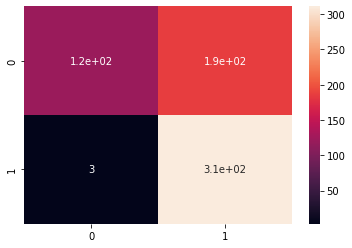

In [35]:
sns.heatmap(confusion_matrix(y_test,clf.predict(x_test_transformed)),annot=True)
plt.show()

In [36]:
cm = confusion_matrix(y_test, clf.predict(x_test_transformed))
index = ['Actually Ham', 'Actually Spam']
df_cm = pd.DataFrame(cm, columns = ['Predicted to be Ham', 'Predicted to be Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm.T

,Actually Ham,Actually Spam
Predicted to be Ham,121,3
Predicted to be Spam,186,311


##Decision Tree

In [37]:
%%time

param_dist = {"max_depth": [3, None],
              "max_features": stats.randint(1, 9),
              "min_samples_leaf": stats.randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=cv, n_iter = 500)

# Fit it to the data
tree_cv.fit(x_train_transformed,y_train)

CPU times: user 2min 10s, sys: 974 ms, total: 2min 11s
Wall time: 2min 28s


In [43]:
print(classification_report(y_test,tree_cv.predict(x_test_transformed)))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       307
           1       0.78      0.72      0.75       314

    accuracy                           0.75       621
   macro avg       0.75      0.75      0.75       621
weighted avg       0.75      0.75      0.75       621



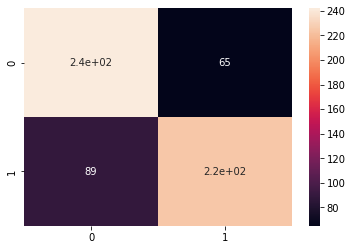

In [41]:
sns.heatmap(confusion_matrix(y_test,tree_cv.predict(x_test_transformed)),annot=True)
plt.show()

In [42]:
cm = confusion_matrix(y_test, tree_cv.predict(x_test_transformed))
index = ['Actually Ham', 'Actually Spam']
df_cm = pd.DataFrame(cm, columns = ['Predicted to be Ham', 'Predicted to be Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm.T

,Actually Ham,Actually Spam
Predicted to be Ham,242,89
Predicted to be Spam,65,225


##SVM

In [30]:
%%time

# Using RandomSearchCV to find the best combination of hyperparameter values for the model
mdl = svc(probability = True, random_state = 1)
auc = make_scorer(roc_auc_score)

# Dictionary of the possible hyperparameter values
rand_list = {"C": stats.uniform(10, 250),
             "gamma": stats.uniform(0.01, 1)}
              
rand_search = RandomizedSearchCV(mdl, param_distributions = rand_list, n_iter = 100, n_jobs = 4, cv = 3, random_state = 2017, scoring = auc) 

# svm = svm.SVC(**rand_search.best_params_)
rand_search.fit(x_train_transformed, y_train)

CPU times: user 5.08 s, sys: 410 ms, total: 5.49 s
Wall time: 3min 27s


In [31]:
print(classification_report(y_test,rand_search.predict(x_test_transformed)))

              precision    recall  f1-score   support

           0       0.62      0.97      0.76       307
           1       0.93      0.42      0.58       314

    accuracy                           0.69       621
   macro avg       0.78      0.70      0.67       621
weighted avg       0.78      0.69      0.67       621



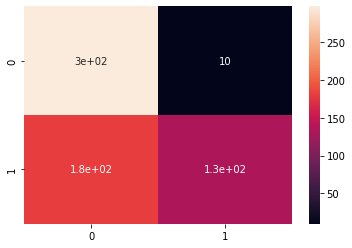

In [32]:
sns.heatmap(confusion_matrix(y_test,rand_search.predict(x_test_transformed)),annot=True)
plt.show()

In [33]:
cm = confusion_matrix(y_test, rand_search.predict(x_test_transformed))
index = ['Actually Ham', 'Actually Spam']
df_cm = pd.DataFrame(cm, columns = ['Predicted to be Ham', 'Predicted to be Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm.T

,Actually Ham,Actually Spam
Predicted to be Ham,297,181
Predicted to be Spam,10,133


##Logistic Regression

In [35]:
# define model
model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = stats.loguniform(1e-5, 100)
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
# execute search
search.fit(x_train_transformed, y_train)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                   estimator=LogisticRegression(), n_iter=500, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f36fbe3e7d0>,
                                        'penalty': ['none', 'l1', 'l2',
                                                    'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   random_state=1, scoring='accuracy')

In [36]:
print(classification_report(y_test,search.predict(x_test_transformed)))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       307
           1       0.80      0.85      0.82       314

    accuracy                           0.81       621
   macro avg       0.81      0.81      0.81       621
weighted avg       0.81      0.81      0.81       621



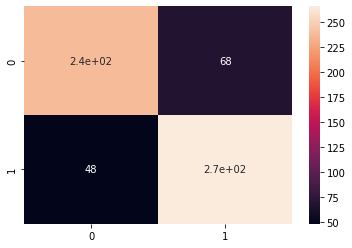

In [37]:
sns.heatmap(confusion_matrix(y_test,search.predict(x_test_transformed)),annot=True)
plt.show()

In [38]:
cm = confusion_matrix(y_test, search.predict(x_test_transformed))
index = ['Actually Ham', 'Actually Spam']
df_cm = pd.DataFrame(cm, columns = ['Predicted to be Ham', 'Predicted to be Spam'])
df_cm[' '] = index
df_cm.set_index(' ', drop = True, inplace = True)
df_cm.T

,Actually Ham,Actually Spam
Predicted to be Ham,239,48
Predicted to be Spam,68,266
